## Notes From Lecture 

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [3]:
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

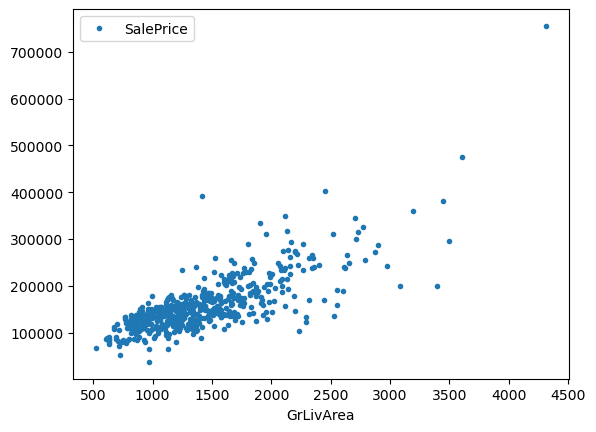

In [4]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [5]:
n = len(data)

In [6]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [7]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [8]:
denominator = n * sum_x2 - sum_x * sum_x

In [9]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [10]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

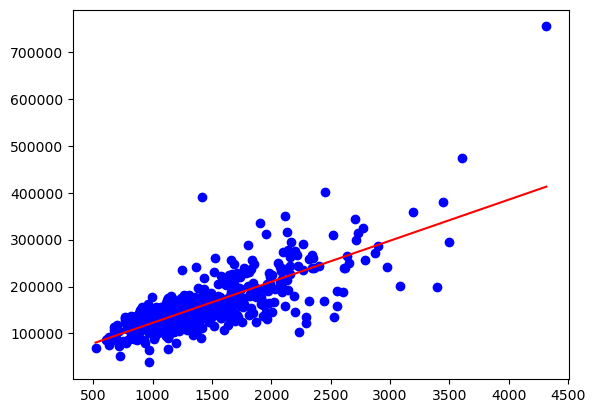

In [11]:
plot_data(x,y,m,b)

In [12]:
def model(x,m,b):
   return m * x + b

In [13]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [14]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [15]:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


In [16]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


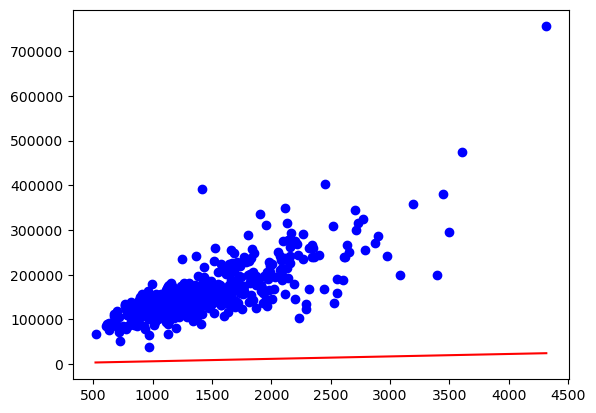

In [17]:
learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


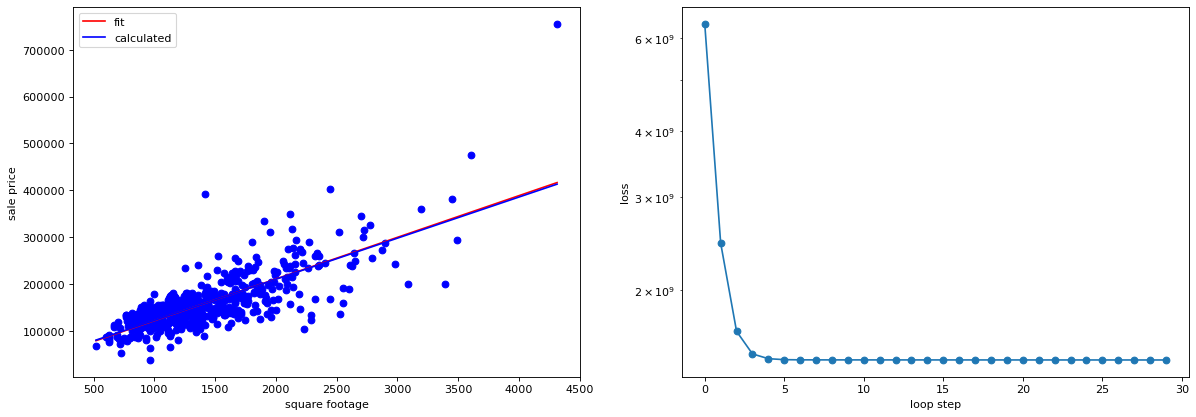

In [18]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

## Home Work Answer

In [21]:
## Function to try different hyperparameters

def train(batch_size, epochs=30, learning_rate_m = 1e-7, learning_rate_b = 1e-1):
    
    loss_history = []
    loop_N = epochs*len(data)//batch_size
    
    m = 5.
    b = 1000.
    
    for i in range(loop_N):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        # update our slope and intercept based on the current values
        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)
    
        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))
        
        # keep a history of our loss values
        loss_history.append(loss_value)
    #loss_last_epoch = np.sum(loss_history[-num_batches:]*batch_size)/len(data)
    return m, b, np.mean(loss(x,y,m,b))

## Minibatch trianing

Batch size: 32
batch size: 32, m=89.6713, b=37467.2217, loss=1509171256.5559
dy_i = 89.67 * x + 37467.22     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


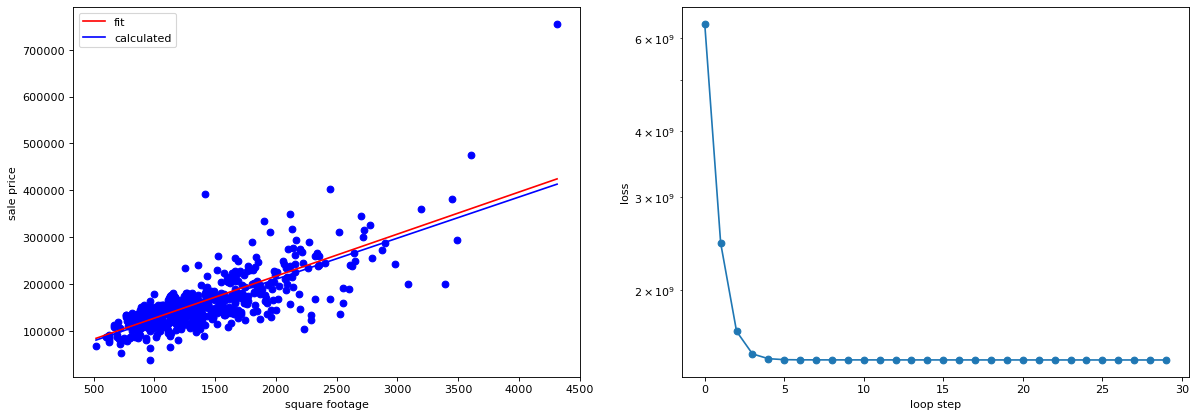

Batch size: 64
batch size: 64, m=87.4307, b=33691.8086, loss=1479829643.6435
dy_i = 87.43 * x + 33691.81     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


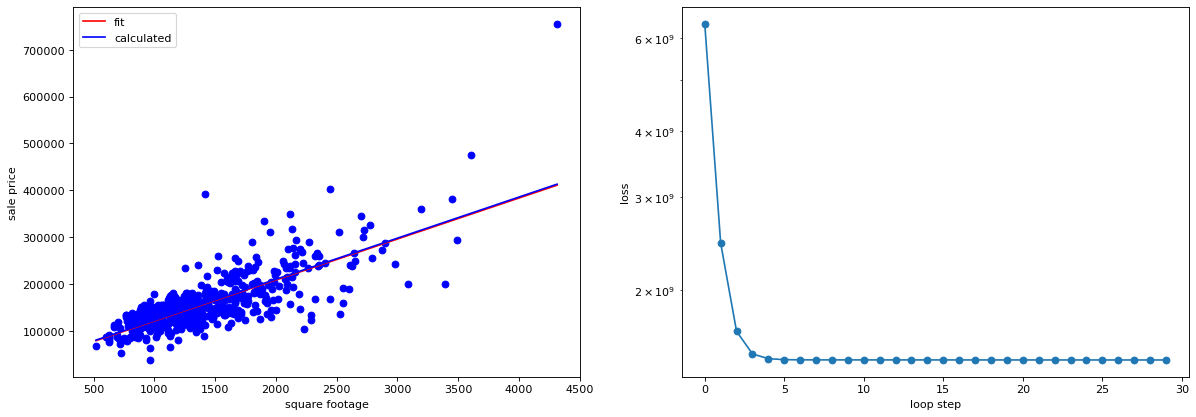

Batch size: 128
batch size: 128, m=91.5876, b=32581.6035, loss=1492966494.7281
dy_i = 91.59 * x + 32581.60     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


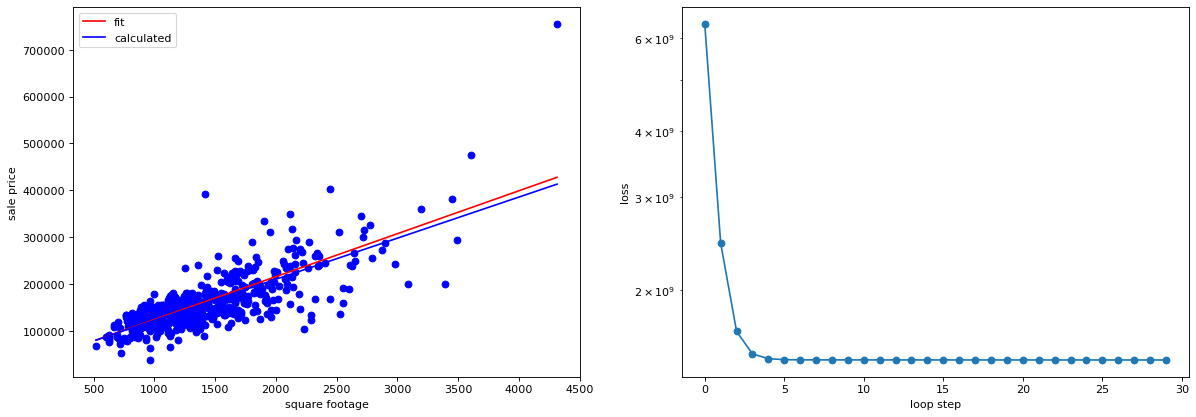

Batch size: 256
batch size: 256, m=88.7969, b=33791.9187, loss=1478477967.5698
dy_i = 88.80 * x + 33791.92     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


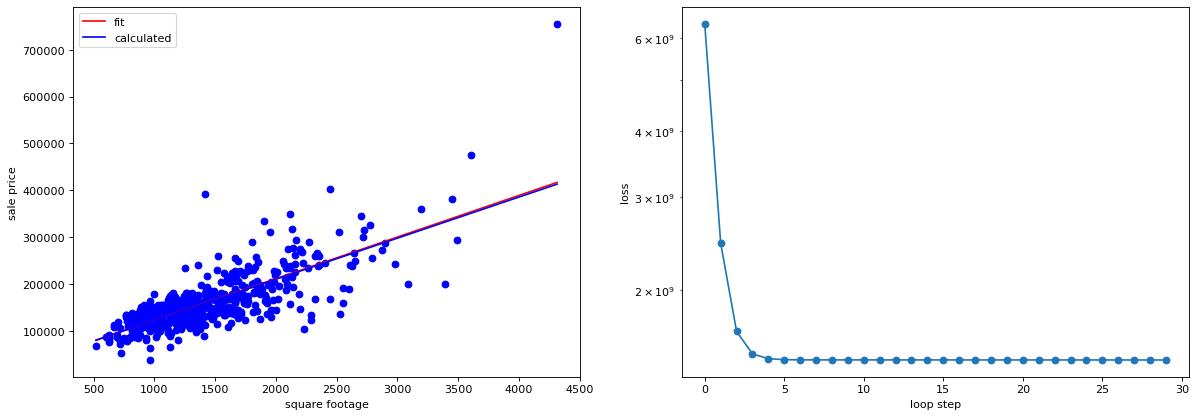

Batch size: 512
batch size: 512, m=89.2485, b=32611.3042, loss=1478453333.3187
dy_i = 89.25 * x + 32611.30     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


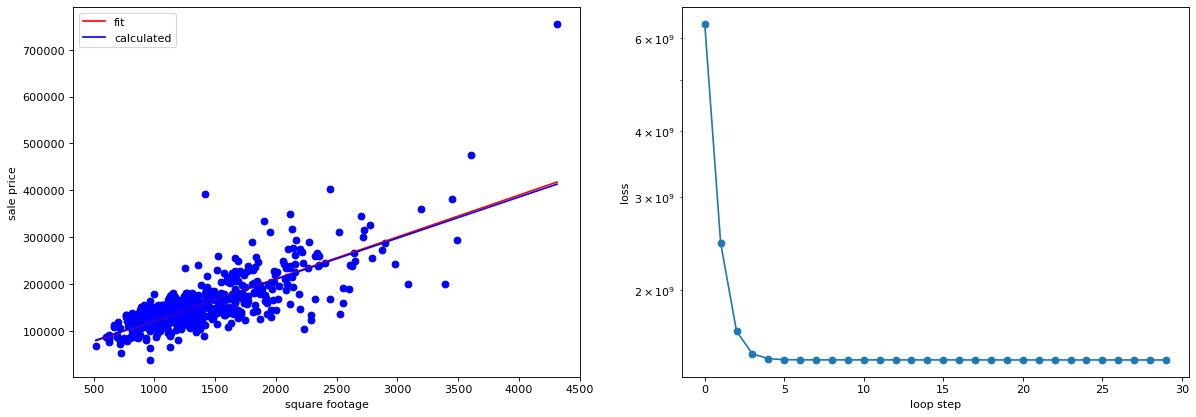

In [20]:
## Plots for each batch size

for bs in [32,64, 128, 256, 512]:
    m, b, l = train(bs, epochs=30)
    
    # print our progress
    print('Batch size: %d' % bs)
    print(f"batch size: {bs}, m={m:.4f}, b={b:.4f}, loss={l:.4f}")
    print('dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (m,b,m_calc,b_calc,loss_value))
   
    # close/delete previous plots
    plt.close('all')
   
    # create a 1 by 2 plot grid
    fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)
    # plot our usual output
    plot_data(data_x, data_y, m, b, ax[0])

    # plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(), data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x, line_y, 'b-', label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0, len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x, loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')

    plt.show()
    # Commented out to keep the plots displayed
    # time.sleep(2.5)
    # ipydis.clear_output(wait=True)

## Learning rate 

In [23]:
for i in 1, 2, 4, 8, 16:
    bs, lrm, lrb = np.array([32, 1e-7, 1e-1])*i
    bs = int(bs)
    m, b, l = train(int(bs), epochs=30, learning_rate_m = lrm, learning_rate_b = lrb)
    print(f"batch size: {bs}, m={m:.4f}, b={b:.4f}, loss={l:.4f}")

batch size: 32, m=89.2968, b=30842.2951, loss=1481204724.4566
batch size: 64, m=95.4748, b=29383.1486, loss=1525710897.1279
batch size: 128, m=79.4117, b=44464.5991, loss=1500368878.7727
batch size: 256, m=98170519.5718, b=32828449920.7652, loss=31904930533937279664128.0000
batch size: 512, m=53553279363891327283921858055897088.0000, b=-201479138913359631876443402832078438400.0000, loss=16683326559961683295946806742375491291477649452781012710993902772876646285312.0000


Batch size: 32, m=86.3486, b=33353.7126, loss=1489074487.8035
Batch size: 64, m=82.2497, b=35072.4758, loss=1539762943.2759
Batch size: 128, m=84.9672, b=39447.8600, loss=1480559558.9801
Batch size: 256, m=-453099925.2551, b=1120217779412.9775, loss=288969630523284017643520.0000
Batch size: 512, m=53026998802469754653187546189660160.0000, b=-198809371088641336547914181282879242240.0000, loss=16185287746967289612674798835360785083714892441038831104757640360482326970368.0000


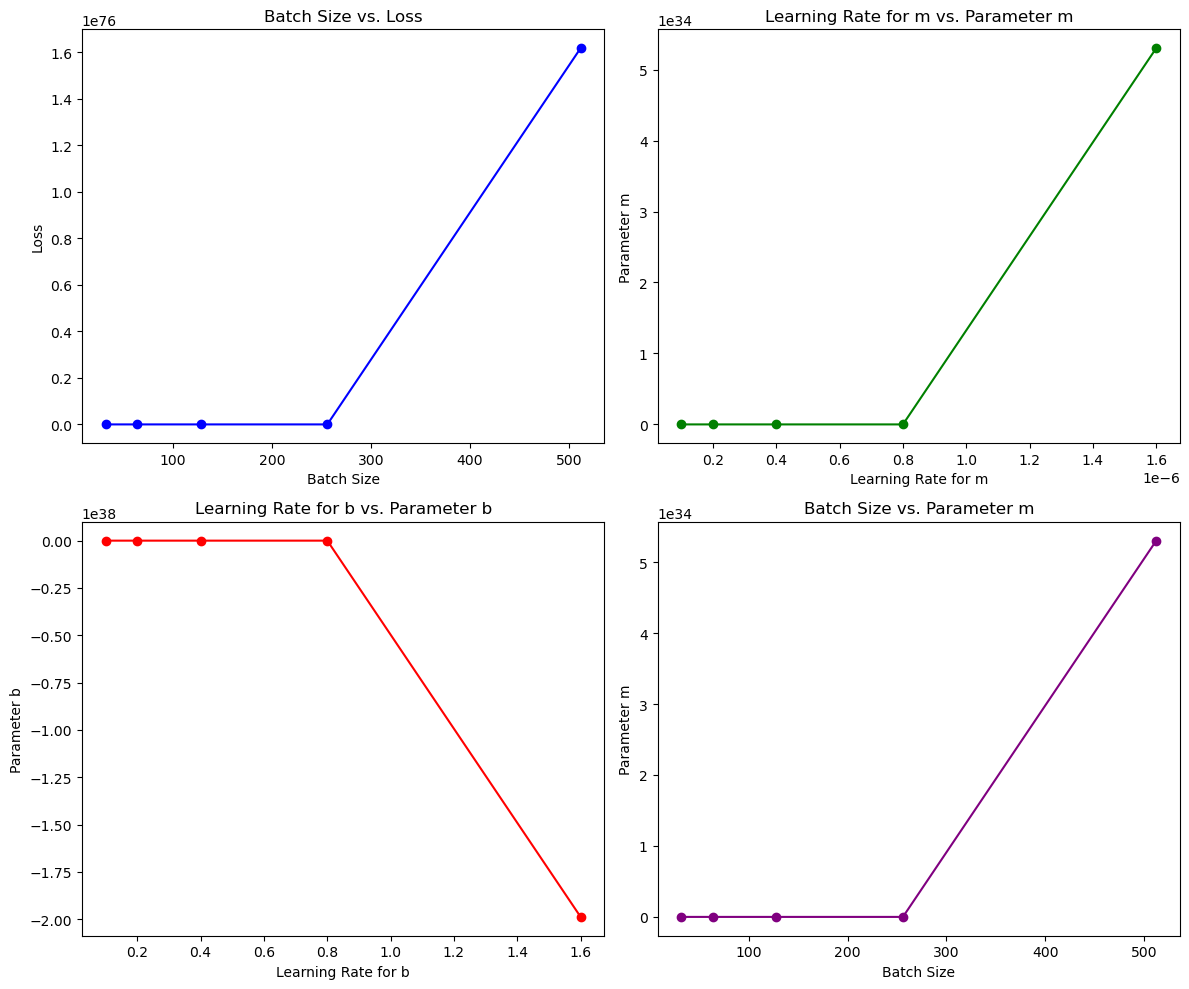

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store data
batch_sizes = []
learning_rate_ms = []
learning_rate_bs = []
ms_list = []
bs_list = []
losses = []

# Loop over the specified values of i
for i in [1, 2, 4, 8, 16]:
    # Calculate batch size and learning rates
    bs, lrm, lrb = np.array([32, 1e-7, 1e-1]) * i
    bs = int(bs)
    # Train the model
    m, b, l = train(bs, epochs=30, learning_rate_m=lrm, learning_rate_b=lrb)
    # Print the results
    print(f"Batch size: {bs}, m={m:.4f}, b={b:.4f}, loss={l:.4f}")
    # Store the results
    batch_sizes.append(bs)
    learning_rate_ms.append(lrm)
    learning_rate_bs.append(lrb)
    ms_list.append(m)
    bs_list.append(b)
    losses.append(l)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Batch Size vs. Loss
axs[0, 0].plot(batch_sizes, losses, 'o-', color='blue')
axs[0, 0].set_xlabel('Batch Size')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Batch Size vs. Loss')

# Learning Rate for m vs. m
axs[0, 1].plot(learning_rate_ms, ms_list, 'o-', color='green')
axs[0, 1].set_xlabel('Learning Rate for m')
axs[0, 1].set_ylabel('Parameter m')
axs[0, 1].set_title('Learning Rate for m vs. Parameter m')

# Learning Rate for b vs. b
axs[1, 0].plot(learning_rate_bs, bs_list, 'o-', color='red')
axs[1, 0].set_xlabel('Learning Rate for b')
axs[1, 0].set_ylabel('Parameter b')
axs[1, 0].set_title('Learning Rate for b vs. Parameter b')

# Batch Size vs. m
axs[1, 1].plot(batch_sizes, ms_list, 'o-', color='purple')
axs[1, 1].set_xlabel('Batch Size')
axs[1, 1].set_ylabel('Parameter m')
axs[1, 1].set_title('Batch Size vs. Parameter m')

plt.tight_layout()
plt.show()